In [3]:
import timeit
import random

In [25]:
def randostr():
    return "".join(chr(random.randint(ord("A"), ord("Z"))) for _ in range(32))

randostr()

'BPRKVQMQCJISWUDPOJIYUQYMJNTPCQHE'

In [26]:
from five_one_one_bplus import BPlusSet

s = BPlusSet()
h_to_o = {}

for _ in range(511):
    rs = randostr()
    h_to_o[hash(rs)] = rs
    s.add(rs)

for v in h_to_o.values():
    assert v in s

In [27]:
def f1(num_items, b):
    
    s = BPlusSet(b=b)
    
    for _ in range(num_items):
        rs = randostr()
        s.add(rs)

def f2():
    
    s = set()
    values = []
    
    for _ in range(127):
        rs = randostr()
        values.append(rs)
        s.add(rs)

    for v in values:
        assert v in s

In [28]:
timeit.timeit("f1(127, 8)", setup="from __main__ import f1, BPlusSet", number=1000)

3.097010733996285

In [29]:
timeit.timeit("f2()", setup="from __main__ import f2", number=1000)

2.775346533017

In [32]:
results = []

for num_items in [10, 50, 100, 500, 1000, 2500, 5000]:
    sub_results_x = []
    sub_results_y = []
    for b in range(2, 33, 2):
        t = timeit.timeit(f"f1({num_items}, {b})", setup="from __main__ import f1, BPlusSet", number=256)
        sub_results_x.append(b)
        sub_results_y.append(t)
    results.append((sub_results_x, sub_results_y, f"{num_items} items"))    

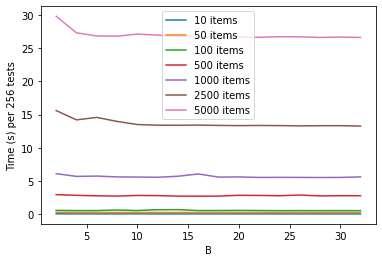

In [33]:
import matplotlib.pyplot as plt

for x, y, label in results:
    plt.plot(x, y, label=label)

plt.xlabel("B")
plt.ylabel("Time (s) per 256 tests")
plt.legend()

plt.show()

In [34]:
def f2(num_items, b):
    
    s = BPlusSet(b=b)
    values = []
    
    for _ in range(num_items):
        rs = randostr()
        values.append(rs)
        s.add(rs)
    
    for _ in range(10_000):
        for v in values:
            assert v in s
        for _ in range(len(values)):
            assert randostr() not in s


In [ ]:
results = []

for num_items in [10, 50, 100, 500, 1000, 2500, 5000]:
    sub_results_x = []
    sub_results_y = []
    for b in range(2, 33, 2):
        t = timeit.timeit(f"f2({num_items}, {b})", setup="from __main__ import f2", number=256)
        sub_results_x.append(b)
        sub_results_y.append(t)
    results.append((sub_results_x, sub_results_y, f"{num_items} items"))

In [ ]:
for x, y, label in results:
    plt.plot(x, y, label=label)

plt.xlabel("B")
plt.ylabel("Time (s) per 256 tests")
plt.legend()

plt.show()